In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_train_validation = pd.read_csv('m5_data/sales_train_validation.csv')

In [3]:
days = [f'd_{i}' for i in range(1886, 1914)]  # d_1886 to d_1913
sales_data = sales_train_validation[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'] + days]

In [4]:
all_items = sales_data['item_id'].unique()
all_stores = sales_data['store_id'].unique()
all_states = sales_data['state_id'].unique()

In [5]:
subset_sales_data = sales_data[
    (sales_data['item_id'].isin(all_items)) &
    (sales_data['store_id'].isin(all_stores)) &
    (sales_data['state_id'].isin(all_states))
]

In [6]:
subset_sales_data = sales_data.copy()

In [7]:
#item level
item_forecasts = []
for item in all_items:
    series = subset_sales_data[subset_sales_data['item_id'] == item][days].sum().values
    try:
        model = ARIMA(series, order=(1,1,1)).fit()
        forecast = model.forecast(steps=28).mean()
    except:
        forecast = series[-28:].mean()  # Fallback to mean if ARIMA fails
    item_forecasts.append({'item_id': item, 'forecast': forecast})
item_forecasts = pd.DataFrame(item_forecasts)
print("Item-level forecasts (first 10 rows):")
print(item_forecasts.head(10))

C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmode

Item-level forecasts (first 10 rows):
         item_id   forecast
0  HOBBIES_1_001   5.341112
1  HOBBIES_1_002   2.753760
2  HOBBIES_1_003   3.410470
3  HOBBIES_1_004  15.925236
4  HOBBIES_1_005   9.394856
5  HOBBIES_1_006   7.705994
6  HOBBIES_1_007   3.454336
7  HOBBIES_1_008  40.324440
8  HOBBIES_1_009   8.491589
9  HOBBIES_1_010   5.894040


In [8]:
#store level
store_forecasts = []
for store in all_stores:
    series = subset_sales_data[subset_sales_data['store_id'] == store][days].sum().values
    try:
        model = ARIMA(series, order=(1,1,1)).fit()
        forecast = model.forecast(steps=28).mean()
    except:
        forecast = series[-28:].mean()
    store_forecasts.append({'store_id': store, 'forecast': forecast})
store_forecasts = pd.DataFrame(store_forecasts)
print("\nStore-level forecasts (first 10 rows):")
print(store_forecasts.head(10))

C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Store-level forecasts (first 10 rows):
  store_id     forecast
0     CA_1  5952.777677
1     CA_2  6012.527678
2     CA_3  7669.219958
3     CA_4  3308.779148
4     TX_1  3332.186592
5     TX_2  3892.957511
6     TX_3  3765.295615
7     WI_1  3884.289205
8     WI_2  5036.956833
9     WI_3  4197.519378


In [9]:
#state level
state_forecasts = []
for state in all_states:
    series = subset_sales_data[subset_sales_data['state_id'] == state][days].sum().values
    try:
        model = ARIMA(series, order=(1,1,1)).fit()
        forecast = model.forecast(steps=28).mean()
    except:
        forecast = series[-28:].mean()
    state_forecasts.append({'state_id': state, 'forecast': forecast})
state_forecasts = pd.DataFrame(state_forecasts)
print("\nState-level forecasts:")
print(state_forecasts)

C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



State-level forecasts:
  state_id      forecast
0       CA  23102.510640
1       TX  11782.725390
2       WI  14198.095215


In [10]:
#total sales forecast
total_series = subset_sales_data[days].sum().values
try:
    total_model = ARIMA(total_series, order=(1,1,1)).fit()
    total_forecast = total_model.forecast(steps=28).mean()
except:
    total_forecast = total_series[-28:].mean()
total_forecast = pd.DataFrame({'level': ['total'], 'forecast': [total_forecast]})
print("\nTotal forecast:")
print(total_forecast)


Total forecast:
   level      forecast
0  total  49668.396065


In [11]:
#Hierarchy and Summing matrix
items = all_items
stores = all_stores
states = all_states

In [12]:
item_to_store = subset_sales_data[['item_id', 'store_id']].drop_duplicates().set_index('item_id')['store_id']
item_to_state = subset_sales_data[['item_id', 'state_id']].drop_duplicates().set_index('item_id')['state_id']
store_to_state = subset_sales_data[['store_id', 'state_id']].drop_duplicates().set_index('store_id')['state_id']
print("\nItem to store mapping:")
print(item_to_store)
print("\nItem to state mapping:")
print(item_to_state)
print("\nStore to state mapping:")
print(store_to_state)


Item to store mapping:
item_id
HOBBIES_1_001    CA_1
HOBBIES_1_002    CA_1
HOBBIES_1_003    CA_1
HOBBIES_1_004    CA_1
HOBBIES_1_005    CA_1
                 ... 
FOODS_3_823      WI_3
FOODS_3_824      WI_3
FOODS_3_825      WI_3
FOODS_3_826      WI_3
FOODS_3_827      WI_3
Name: store_id, Length: 30490, dtype: object

Item to state mapping:
item_id
HOBBIES_1_001    CA
HOBBIES_1_002    CA
HOBBIES_1_003    CA
HOBBIES_1_004    CA
HOBBIES_1_005    CA
                 ..
FOODS_3_823      WI
FOODS_3_824      WI
FOODS_3_825      WI
FOODS_3_826      WI
FOODS_3_827      WI
Name: state_id, Length: 9147, dtype: object

Store to state mapping:
store_id
CA_1    CA
CA_2    CA
CA_3    CA
CA_4    CA
TX_1    TX
TX_2    TX
TX_3    TX
WI_1    WI
WI_2    WI
WI_3    WI
Name: state_id, dtype: object


In [13]:
n_items = len(items)
n_stores = len(stores)
n_states = len(states)
n_total = 1
n_bottom = n_items
n_total_nodes = n_total + n_states + n_stores + n_items

In [14]:
# Mapping of items to stores and states
item_to_store = sales_train_validation[['item_id', 'store_id']].drop_duplicates().set_index('item_id')['store_id']
item_to_state = sales_train_validation[['item_id', 'state_id']].drop_duplicates().set_index('item_id')['state_id']
store_to_state = sales_train_validation[['store_id', 'state_id']].drop_duplicates().set_index('store_id')['state_id']

In [15]:
S = np.zeros((n_total_nodes, n_bottom))

In [16]:
item_idx = {item: i for i, item in enumerate(items)}
store_idx = {store: i + n_total + n_states for i, store in enumerate(stores)}
state_idx = {state: i + n_total for i, state in enumerate(states)}
total_idx = 0

In [17]:
S[total_idx, :] = 1

In [18]:
#State level
for item in items:
    state = item_to_state.loc[item]
    if isinstance(state, pd.Series):
        state = state.iloc[0]
    S[state_idx[state], item_idx[item]] = 1

In [19]:
#Store level
for item in items:
    store = item_to_store.loc[item]
    if isinstance(store, pd.Series):
        store = store.iloc[0]
    S[store_idx[store], item_idx[item]] = 1

In [20]:
#Item level
for i in range(n_items):
    S[n_total + n_states + n_stores + i, i] = 1

In [21]:
#Collect base forecasts in a vector
base_forecasts = np.zeros(n_total_nodes)
base_forecasts[total_idx] = total_forecast['forecast'].values[0]
for state in states:
    base_forecasts[state_idx[state]] = state_forecasts[state_forecasts['state_id'] == state]['forecast'].values[0]
for store in stores:
    base_forecasts[store_idx[store]] = store_forecasts[store_forecasts['store_id'] == store]['forecast'].values[0]
for item in items:
    base_forecasts[n_total + n_states + n_stores + item_idx[item]] = item_forecasts[item_forecasts['item_id'] == item]['forecast'].values[0]

In [22]:
# Cell 18: Bottom-Up (BU) Reconciliation
bu_forecasts = np.dot(S, base_forecasts[n_total + n_states + n_stores:])

In [23]:
#MinT Reconciliation (OLS approximation)
G = np.linalg.pinv(S.T @ S) @ S.T
reconciled_forecasts = np.dot(S, G @ base_forecasts)
reconciled_forecasts = np.maximum(reconciled_forecasts, 0)  # Ensure non-negativity

In [24]:
#Organize reconciled forecasts
reconciled_df = pd.DataFrame({
    'level': ['total'] + list(states) + list(stores) + list(items),
    'base_forecast': base_forecasts,
    'bu_forecast': bu_forecasts,
    'mint_forecast': reconciled_forecasts
})
print("\nReconciled Forecasts (first 20 rows):")
print(reconciled_df.head(20))
print("\nSummary of Differences:")
print("Total Base Forecast:", reconciled_df[reconciled_df['level'] == 'total']['base_forecast'].values[0])
print("Total Bottom-Up Forecast:", reconciled_df[reconciled_df['level'] == 'total']['bu_forecast'].values[0])
print("Total MinT Forecast:", reconciled_df[reconciled_df['level'] == 'total']['mint_forecast'].values[0])


Reconciled Forecasts (first 20 rows):
            level  base_forecast   bu_forecast  mint_forecast
0           total   49668.396065  43886.326566   26243.156975
1              CA   23102.510640  43886.326566   26243.156975
2              TX   11782.725390      0.000000       0.000000
3              WI   14198.095215      0.000000       0.000000
4            CA_1    5952.777677  43886.326566   26243.156975
5            CA_2    6012.527678      0.000000       0.000000
6            CA_3    7669.219958      0.000000       0.000000
7            CA_4    3308.779148      0.000000       0.000000
8            TX_1    3332.186592      0.000000       0.000000
9            TX_2    3892.957511      0.000000       0.000000
10           TX_3    3765.295615      0.000000       0.000000
11           WI_1    3884.289205      0.000000       0.000000
12           WI_2    5036.956833      0.000000       0.000000
13           WI_3    4197.519378      0.000000       0.000000
14  HOBBIES_1_001       5.34111

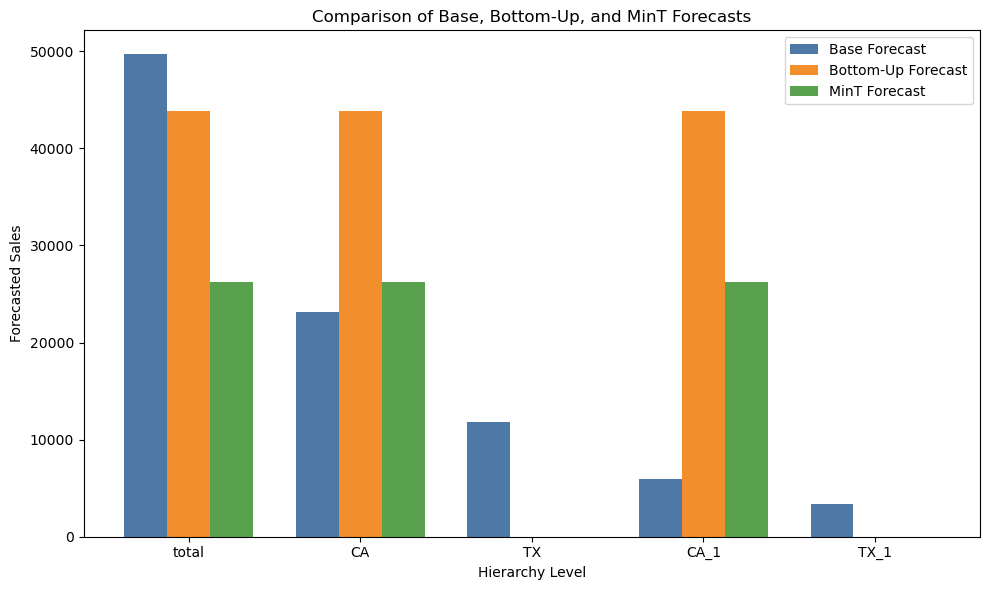

In [25]:
import matplotlib.pyplot as plt
# Cell 21: Visualize the results using Matplotlib
subset_levels = ['total', 'CA', 'TX', 'CA_1', 'TX_1']
subset_df = reconciled_df[reconciled_df['level'].isin(subset_levels)]

# Prepare data for plotting
levels = subset_df['level'].tolist()
base_values = subset_df['base_forecast'].tolist()
bu_values = subset_df['bu_forecast'].tolist()
mint_values = subset_df['mint_forecast'].tolist()

# Set up the bar chart
x = np.arange(len(levels))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, base_values, width, label='Base Forecast', color='#4e79a7')
plt.bar(x, bu_values, width, label='Bottom-Up Forecast', color='#f28e2b')
plt.bar(x + width, mint_values, width, label='MinT Forecast', color='#59a14f')

# Customize the chart
plt.xlabel('Hierarchy Level')
plt.ylabel('Forecasted Sales')
plt.title('Comparison of Base, Bottom-Up, and MinT Forecasts')
plt.xticks(x, levels)
plt.legend()
plt.tight_layout()

# Display the chart
plt.show()